### Loading Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

### Analysing Dataset and encoding categorical columns

In [5]:
df = pd.read_csv('clinical_data_imputed2.csv')

In [7]:
df

,Codigo,Diagnostico,Dxo,dxcog,clasif,Glu,Cho,HDl,TG,LDL,...,BDNF,NGF,Nitritos,TNF,IL6,IL1,MDA,VAR00191,"(13, 'Diagnostico')","(26, 'Diagnostico')"
0,101,0,Control,Control,1.0,97.0,177.0,42.0,63.0,122.0,...,17490.496199,9784.695578,0.134777,3.187411,5.608703,29.475037,2.58970,101.0,0,0
1,102,0,Control,Control,1.0,105.0,205.0,66.0,55.0,128.0,...,17484.303640,9783.962535,-0.076734,3.191700,5.605527,29.486567,2.59667,102.0,0,0
2,103,0,Control,Control,1.0,102.0,196.0,56.0,62.0,128.0,...,25225.000000,10068.837210,1.159000,2.183974,1.291000,31.695000,2.45500,103.0,0,0
3,104,0,Control,Control,1.0,86.0,185.0,54.0,80.0,115.0,...,16132.894740,8924.651163,2.193200,2.048844,3.931000,16.678000,2.45500,104.0,0,0
4,105,0,Control,Control,2.0,94.0,270.0,48.0,168.0,188.0,...,23047.368420,7738.604651,4.520300,2.116410,11.266000,12.583000,2.45500,105.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,336,1,BD,BD,9.0,100.0,187.0,48.0,247.0,90.0,...,12291.818180,8369.180328,5.890200,0.475693,0.676000,14.641000,0.93000,336.0,0,0
142,337,1,BD,BD,10.0,82.0,229.0,54.0,121.0,151.0,...,5332.727273,4957.704918,0.041200,1.084646,3.331000,14.641000,2.45500,337.0,0,0
143,338,1,BD,BD,10.0,75.0,135.0,41.0,69.0,80.0,...,6969.090909,11642.950820,0.804100,4.197074,1.641000,14.641000,1.69300,338.0,0,0
144,339,1,BD,BD,10.0,91.0,162.0,49.0,58.0,101.0,...,6437.272727,11770.819670,1.058400,3.046830,6.469000,31.303000,1.69300,339.0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Codigo               146 non-null    int64  
 1   Diagnostico          146 non-null    int64  
 2   Dxo                  131 non-null    object 
 3   dxcog                141 non-null    object 
 4   clasif               146 non-null    float64
 5   Glu                  146 non-null    float64
 6   Cho                  146 non-null    float64
 7   HDl                  146 non-null    float64
 8   TG                   146 non-null    float64
 9   LDL                  146 non-null    float64
 10  Homoc                146 non-null    float64
 11  creat                146 non-null    float64
 12  Prot                 146 non-null    float64
 13  Alb                  146 non-null    float64
 14  Transf               146 non-null    float64
 15  ferrit               146 non-null    flo

In [11]:
df.isna().sum()

Codigo                  0
Diagnostico             0
Dxo                    15
dxcog                   5
clasif                  0
Glu                     0
Cho                     0
HDl                     0
TG                      0
LDL                     0
Homoc                   0
creat                   0
Prot                    0
Alb                     0
Transf                  0
ferrit                  0
Hb                      0
CardiolIGG              0
CardioIGM               0
TQ                      0
TP                      0
TTPA                    0
Fifrinogeno             0
T3                      0
TSH                     0
T4                      0
B12                     0
FOLICO                  0
IGF1                    0
BDNF                    0
NGF                     0
Nitritos                0
TNF                     0
IL6                     0
IL1                     0
MDA                     0
VAR00191                0
(13, 'Diagnostico')     0
(26, 'Diagno

### Filling missing values with the most common value in that column

In [15]:
pd.value_counts(df['Dxo'])

C:\Users\pshar\AppData\Local\Temp\ipykernel_6040\2605530944.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Dxo'])


Dxo
Control    50
BD         38
AD         27
0          16
Name: count, dtype: int64

In [21]:
df['Dxo'] = df['Dxo'].fillna('Control')

In [25]:
pd.value_counts(df['dxcog'])

C:\Users\pshar\AppData\Local\Temp\ipykernel_6040\2414489828.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['dxcog'])


dxcog
Ad         52
Control    51
BD         38
Name: count, dtype: int64

In [27]:
df['dxcog'] = df['dxcog'].fillna('Ad')

In [31]:
df.drop(columns=['Codigo'], inplace=True)

### Encoding

In [33]:
categorical_cols = ['dxcog', 'Dxo']  # replace with your actual column names
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 


for col in categorical_cols:
    le = label_encoders[col]
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Mapping for {col}:", mapping)


Mapping for dxcog: {'Ad': 0, 'BD': 1, 'Control': 2}
Mapping for Dxo: {'0': 0, 'AD': 1, 'BD': 2, 'Control': 3}


### X and y definition

In [39]:
X,y = df.drop(columns=['Diagnostico']), df['Diagnostico']

### Dimensionality reduction (2D PCA) -> Scaling -> SVM

#---------------------------------------------- SVM Polynomial Kernel Training ----------------------------------------------#
Proceed to enter the degree range values [lb , ub]


Enter the lower bound (lb) of degree:  1
Enter the upper bound (ub) of degree:  5


Proceed to enter the coefficient range values [lb, ub]


Enter the lower bound (lb) of coefficient:  1
Enter the upper bound (ub) of coefficient:  5


Best params: {'svc__coef0': 2, 'svc__degree': 4}
Best CV score: 0.7566666666666666


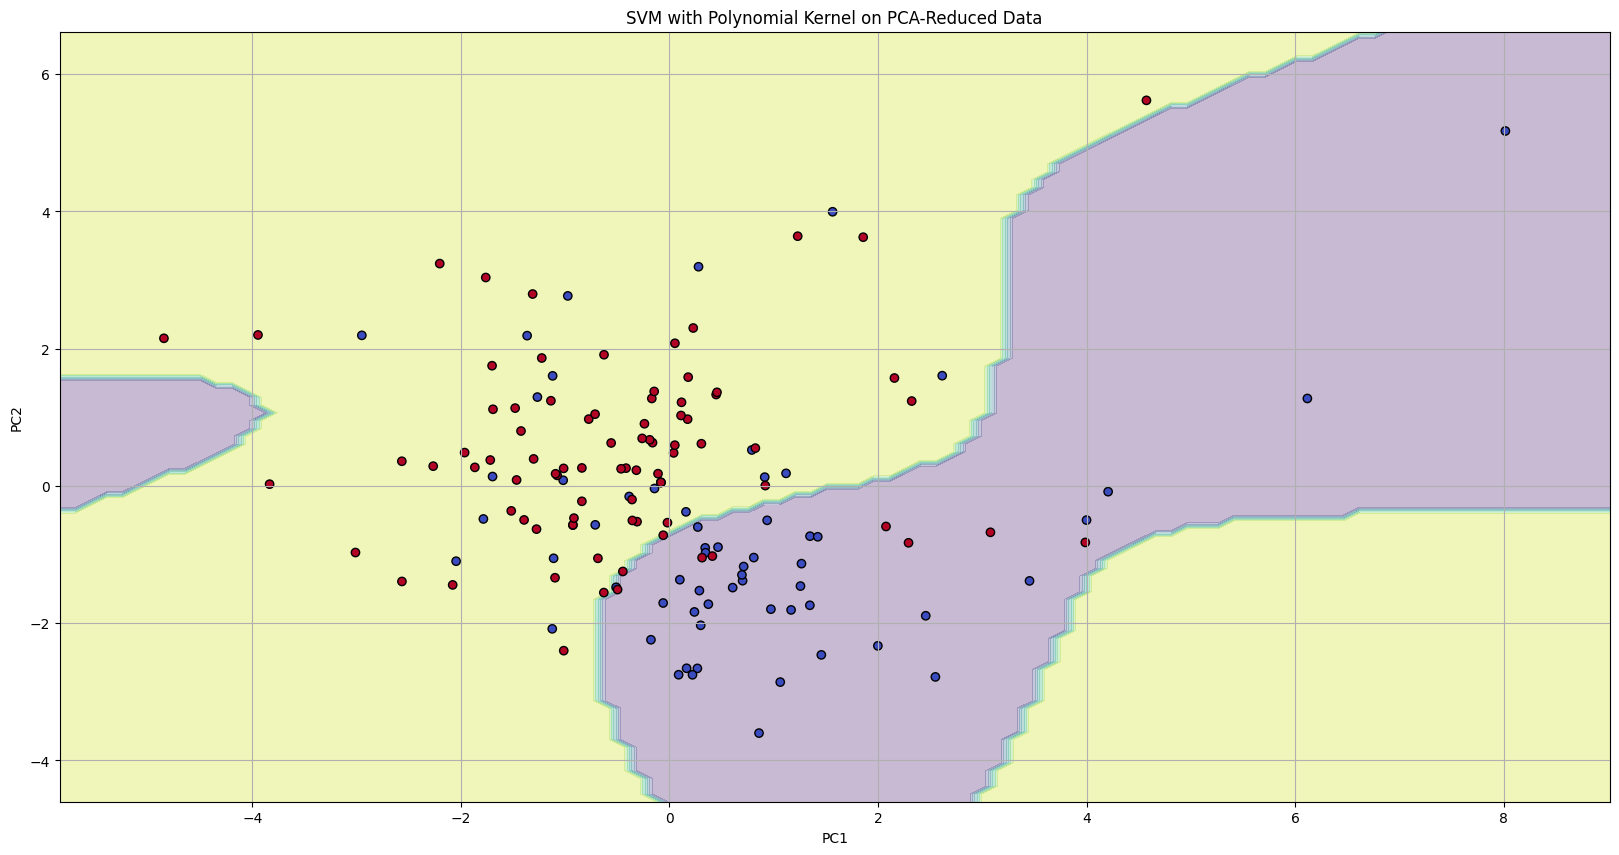

#---------------------------------------------- SVM Polynomial Kernel Complete ----------------------------------------------#


In [41]:
print("#---------------------------------------------- SVM Polynomial Kernel Training ----------------------------------------------#\n")

print("Proceed to enter the degree range values [lb , ub]")
low_deg = int(input('Enter the lower bound (lb) of degree: '))
up_deg = int(input('Enter the upper bound (ub) of degree: '))

print("\nProceed to enter the coefficient range values [lb, ub]")
low_coef = int(input('Enter the lower bound (lb) of coefficient: '))
up_coef = int(input('Enter the upper bound (ub) of coefficient: '))

scaler = StandardScaler()
pca = PCA(n_components=2)

pipeline = make_pipeline(scaler, pca, SVC(kernel='poly'))

param_grid = {
    'svc__degree' : list(range(low_deg, up_deg + 1)),
    'svc__coef0' : list(range(low_coef, up_coef + 1)),
}

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X, y)

print(f"Best params: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_}")

best_model = grid_search.best_estimator_

# PCA transformation for plotting
X_scaled = best_model.named_steps['standardscaler'].transform(X)
X_pca = best_model.named_steps['pca'].transform(X_scaled)

y_pred = best_model.predict(X)

# Plot decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = best_model.named_steps['svc'].predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(20,10))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("SVM with Polynomial Kernel on PCA-Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

print("#---------------------------------------------- SVM Polynomial Kernel Complete ----------------------------------------------#")


In [44]:
y_pred = cross_val_predict(best_model, X, y, cv=10)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.61      0.69        64
           1       0.74      0.88      0.80        82

    accuracy                           0.76       146
   macro avg       0.77      0.74      0.75       146
weighted avg       0.77      0.76      0.75       146



### **76 percent accurary** achieved using 2 component PCA and SVM

### Dimensionality reduction (3D PCA) -> Scaling -> SVM

#---------------------------------------------- SVM Polynomial Kernel Training ----------------------------------------------#

Proceed to enter the degree range values [lb , ub]


Enter the lower bound (lb) of degree:  1
Enter the upper bound (ub) of degree:  5



Proceed to enter the coefficient range values [lb, ub]


Enter the lower bound (lb) of coefficient:  1
Enter the upper bound (ub) of coefficient:  5


Best params: {'svc__coef0': 2, 'svc__degree': 2}
Best CV score: 0.7976190476190477


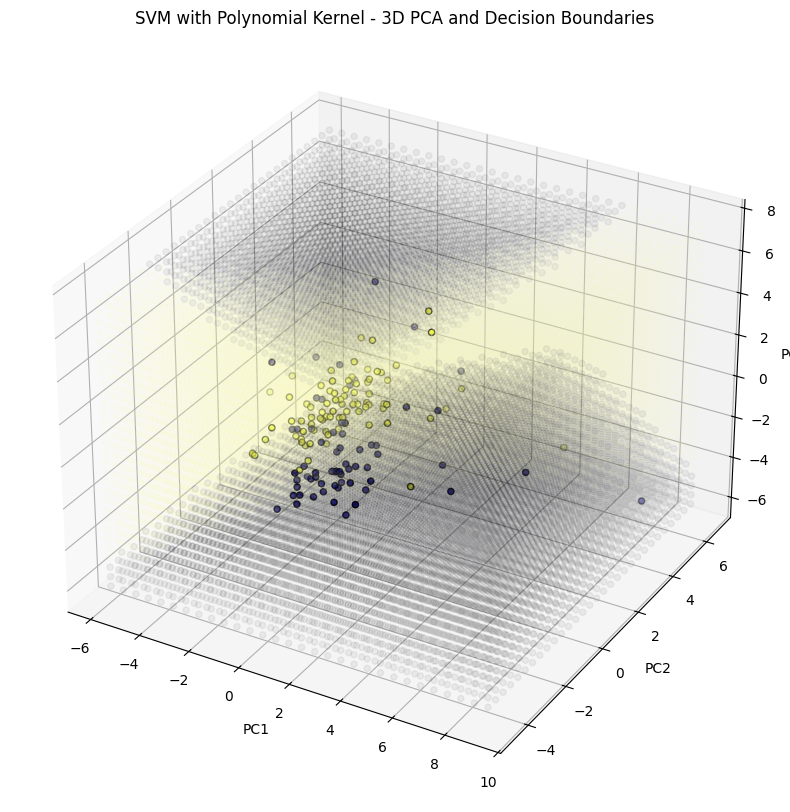

#---------------------------------------------- SVM Polynomial Kernel Complete ----------------------------------------------#


In [77]:
print("#---------------------------------------------- SVM Polynomial Kernel Training ----------------------------------------------#\n")

print("Proceed to enter the degree range values [lb , ub]")
low_deg = int(input('Enter the lower bound (lb) of degree: '))
up_deg = int(input('Enter the upper bound (ub) of degree: '))

print("\nProceed to enter the coefficient range values [lb, ub]")
low_coef = int(input('Enter the lower bound (lb) of coefficient: '))
up_coef = int(input('Enter the upper bound (ub) of coefficient: '))

scaler = StandardScaler()
pca = PCA(n_components=3)

pipeline = make_pipeline(scaler, pca, SVC(kernel='poly'))

param_grid = {
    'svc__degree' : list(range(low_deg, up_deg + 1)),
    'svc__coef0' : list(range(low_coef, up_coef + 1)),
}

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X, y)

print(f"Best params: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_}")

best_model = grid_search.best_estimator_

# PCA transformation for plotting
X_scaled = best_model.named_steps['standardscaler'].transform(X)
X_pca = best_model.named_steps['pca'].transform(X_scaled)

y_pred = best_model.predict(X)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
z_min, z_max = X_pca[:, 2].min() - 1, X_pca[:, 2].max() + 1

xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 30),
                         np.linspace(y_min, y_max, 30),
                         np.linspace(z_min, z_max, 30))

grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]

Z = best_model.named_steps['svc'].predict(grid_points)
Z = Z.reshape(xx.shape)


fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='plasma', edgecolors='k')
ax.scatter(xx, yy, zz, c=Z, alpha=0.05, cmap='inferno')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("SVM with Polynomial Kernel - 3D PCA and Decision Boundaries")
plt.show()

print("#---------------------------------------------- SVM Polynomial Kernel Complete ----------------------------------------------#")


In [79]:
y_pred = cross_val_predict(best_model, X, y, cv=10)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.59      0.72        64
           1       0.75      0.96      0.84        82

    accuracy                           0.80       146
   macro avg       0.84      0.78      0.78       146
weighted avg       0.83      0.80      0.79       146



### **80 percent accurary** achieved using 3 component PCA and SVM